In [1]:
import pandas as pd

In [2]:
rt = pd.read_csv("Dataset.csv")

In [3]:
rt.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
rt.shape

(9551, 21)

In [5]:
# Check for missing values
rt.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Fill missing values in the 'Cuisines' column with 'NaN'
rt.fillna('NaN', inplace=True)

In [7]:
#List of columns to remove
columns_to_remove = ['Restaurant ID','Restaurant Name','Country Code', 'City', 'Address', 'Locality',
                     'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines','Currency'
                     ]

# Remove the columns from the DataFrame
rt = rt.drop(columns_to_remove, axis=1)


In [8]:
rt

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,No,No,No,No,3,4.1,Green,Very Good,788
9547,105,No,No,No,No,3,4.2,Green,Very Good,1034
9548,170,No,No,No,No,4,3.7,Yellow,Good,661
9549,120,No,No,No,No,4,4.0,Green,Very Good,901


In [9]:
rt.duplicated().sum()

2871

In [10]:
rt.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [12]:
max_avg_cost, max_rating = rt['Average Cost for two'].max(), rt['Aggregate rating'].max()
print(max_avg_cost,"\n",max_rating)

800000 
 4.9


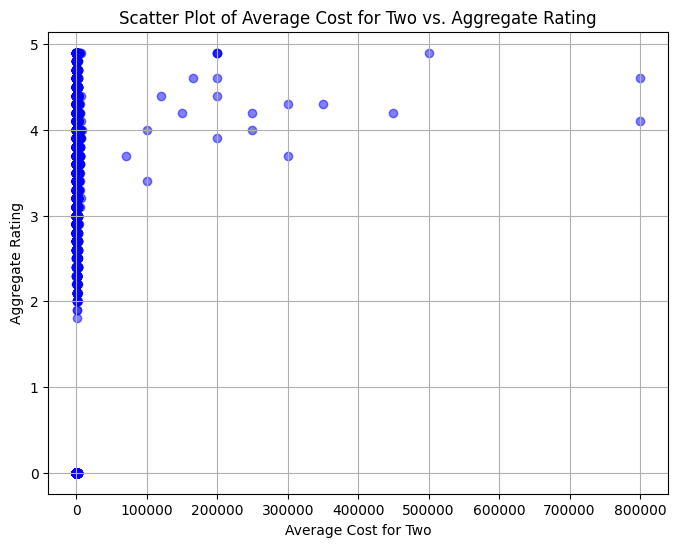

In [13]:
import matplotlib.pyplot as plt
average_cost = rt['Average Cost for two']
aggregate_rating = rt['Aggregate rating']

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_cost, aggregate_rating, color='blue', alpha=0.5)
plt.title('Scatter Plot of Average Cost for Two vs. Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
     

# Columns to be encoded
columns_to_encode = ['Has Table booking', 'Has Online delivery', 'Is delivering now',
                     'Switch to order menu', 'Rating color', 'Rating text']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the specified columns
rt[columns_to_encode] = rt[columns_to_encode].apply(label_encoder.fit_transform)

# Check the updated dataframe
print(rt.head())

   Average Cost for two  Has Table booking  Has Online delivery  \
0                  1100                  1                    0   
1                  1200                  1                    0   
2                  4000                  1                    0   
3                  1500                  0                    0   
4                  1500                  1                    0   

   Is delivering now  Switch to order menu  Price range  Aggregate rating  \
0                  0                     0            3               4.8   
1                  0                     0            3               4.5   
2                  0                     0            4               4.4   
3                  0                     0            4               4.9   
4                  0                     0            4               4.8   

   Rating color  Rating text  Votes  
0             0            1    314  
1             0            1    591  
2             1     

In [15]:
rt

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


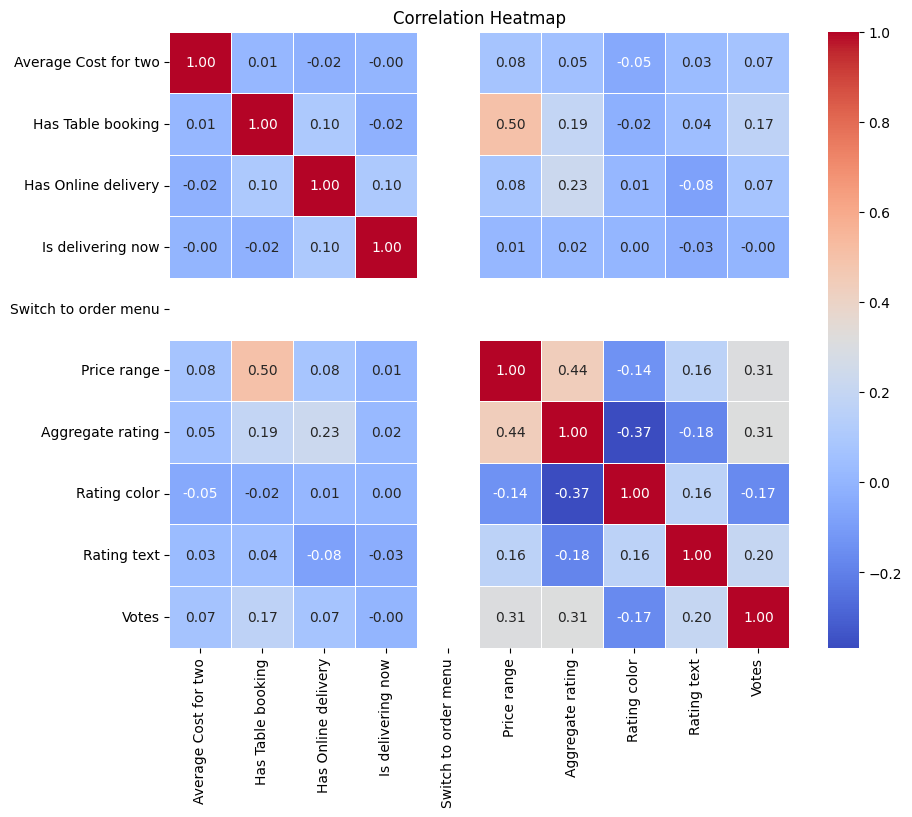

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(rt.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
X = rt.drop('Aggregate rating', axis=1)
y = rt['Aggregate rating']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=200)
X_train.head()
y_train.head()

8727    3.1
3255    0.0
1559    2.6
2945    3.7
7749    3.1
Name: Aggregate rating, dtype: float64

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Initialize Linear Regression model
linear_model = LinearRegression()

# Initialize Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=100)

# Perform cross-validation and calculate R-squared scores for Linear Regression
r2_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='r2')

# Perform cross-validation and calculate R-squared scores for Decision Tree
r2_scores_tree = cross_val_score(tree_model, X, y, cv=5, scoring='r2')

In [20]:
# Perform cross-validation and calculate MSE scores for Linear Regression
mse_scores_linear = -cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation and calculate MSE scores for Decision Tree
mse_scores_tree = -cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [21]:
# Round MSE scores to 2 decimal places
mse_scores_linear_rounded = [round(score, 2) for score in mse_scores_linear]
mse_scores_tree_rounded = [round(score, 2) for score in mse_scores_tree]

# Print the rounded MSE scores
print("Linear Regression MSE scores:", mse_scores_linear_rounded)
print("Mean MSE for Linear Regression:", round(mse_scores_linear.mean(), 2))
print("Decision Tree MSE scores:", mse_scores_tree_rounded)
print("Mean MSE for Decision Tree:", round(mse_scores_tree.mean(), 2))

Linear Regression MSE scores: [1.73, 1.41, 1.44, 1.33, 37.69]
Mean MSE for Linear Regression: 8.72
Decision Tree MSE scores: [0.05, 0.06, 0.06, 0.05, 0.05]
Mean MSE for Decision Tree: 0.05


Analysis shows Decision Tree better performs than Linear Regression for predicting aggregate ratings.
Decision Tree achieves a much lower Mean Squared Error (0.05) compared to Linear Regression (8.72) and a higher Mean R-squared (0.97) indicating a better fit for the data.
This suggests a non-linear relationship between average cost and ratings, which Decision Trees handle better.

